In [ ]:
# Setting up the Colab page to use neqsim
%%capture
!pip install neqsim
from neqsim.process import openprocess
import urllib
import time
# Importing the TEG process from file
!wget https://github.com/equinor/neqsimprocess/raw/master/lib/TEGprocessHX.neqsim

In [ ]:
# importing the process from the stored file
# See: https://github.com/equinor/neqsimprocess/blob/master/src/neqsimprocess/glycol/TEGprocess.java
# See Figure 1 for process flow diagram
TEGprocess = openprocess('TEGprocessHX.neqsim')

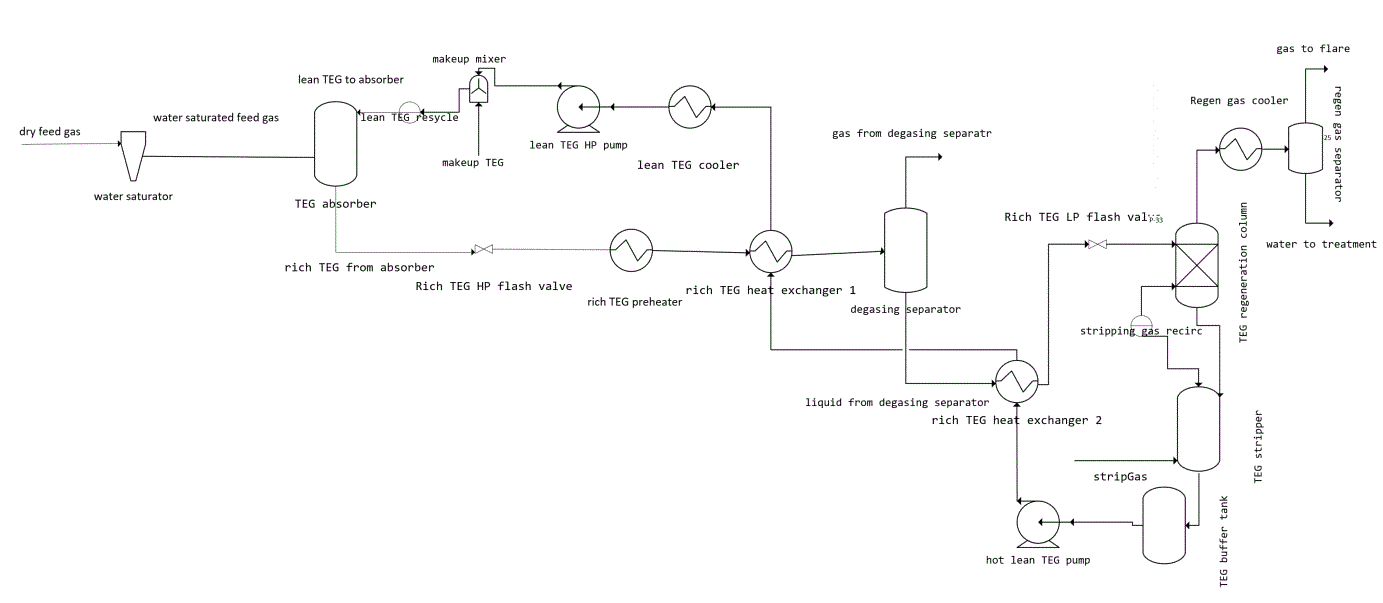

In [ ]:
# Set input parameters
TEGprocess.getUnit("dry feed gas").setFlowRate(11.23, 'MSm3/day')
TEGprocess.getUnit("dry feed gas").setTemperature(30.4, 'C')
TEGprocess.getUnit("dry feed gas").setPressure(52.21, "bara")
TEGprocess.getUnit("lean TEG to absorber").setFlowRate(6862.5, "kg/hr")
TEGprocess.getUnit("Rich TEG HP flash valve").setOutletPressure(4.9)
TEGprocess.getUnit("Rich TEG LP flash valve").setOutletPressure(1.23)
TEGprocess.getUnit("TEG regeneration column").getCondenser().setOutTemperature(273.15 + 100.0)
TEGprocess.getUnit("TEG regeneration column").getReboiler().setOutTemperature(273.15 + 206.6)
TEGprocess.getUnit("TEG regeneration column").setBottomPressure(1.23)
TEGprocess.getUnit("TEG regeneration column").setTopPressure(1.2)
TEGprocess.getUnit("regen gas cooler").setOutTemperature(273.15+37.5)
TEGprocess.getUnit("stripGas").setPressure(1.23, "bara")
TEGprocess.getUnit("stripGas").setFlowRate(90.0, "Sm3/hr")
TEGprocess.getUnit("stripGas").setTemperature(80.0, 'C')
TEGprocess.getUnit("TEG buffer tank").setOutTemperature(273.15+185.0)
TEGprocess.getUnit("hot lean TEG pump").setOutletPressure(20.0)
TEGprocess.getUnit("lean TEG cooler").setOutTemperature(273.15+43.0)                            
TEGprocess.getUnit("lean TEG HP pump").setOutletPressure(52.21)

In [ ]:
#Run the process calculations
tic = time.perf_counter()
TEGprocess.run()
toc = time.perf_counter()
print(f"Simulation run in {toc - tic:0.4f} seconds")

Simulation run in 19.2158 seconds


In [ ]:
#Read results
wetGasRatekghr = TEGprocess.getUnit("water saturated feed gas").getFlowRate("kg/hr")
waterInWetGasppm = TEGprocess.getUnit("water saturated feed gas").getFluid().getPhase(0).getComponent('water').getz()*1.0e6
waterInDryGasppm = TEGprocess.getUnit("dry gas from absorber").getFluid().getPhase(0).getComponent('water').getz()*1.0e6
waterInWetGaskgMSm3 = waterInWetGasppm*0.01802*101325.0/(8.314*288.15)
waterInDryGaskgMSm3 = waterInDryGasppm*0.01802*101325.0/(8.314*288.15)
waterInWetGaskghr = waterInWetGaskgMSm3*TEGprocess.getUnit("water saturated feed gas").getFlowRate("Sm3/day")/1.0e6/24.0
waterInDryGaskghr = waterInDryGaskgMSm3*TEGprocess.getUnit("dry gas from absorber").getFlowRate("Sm3/day")/1.0e6/24.0
waterInDryGaskgMSm3 = waterInDryGasppm*0.01802*101325.0/(8.314*288.15)
wtLeanTEGFromReboiler = TEGprocess.getUnit("TEG regeneration column").getLiquidOutStream().getFluid().getPhase("aqueous").getWtFrac("TEG")*100.0
wtLeanTEGFromStripper = TEGprocess.getUnit("TEG stripper").getSolventOutStream().getFluid().getPhase("aqueous").getWtFrac("TEG")*100.0
wtRichTEGFromAbsorber = TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFluid().getPhase("aqueous").getWtFrac("TEG")*100.0
richTEGtemperature = TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFluid().getTemperature("C")
waterInRichTEGkghr = TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFluid().getPhase("aqueous").getWtFrac("water")*TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFluid().getFlowRate("kg/hr")
TEGcirculationratelitreperkg = TEGprocess.getUnit("TEG absorber").getSolventInStream().getFlowRate("kg/hr")*wtLeanTEGFromStripper/100/waterInWetGaskghr
richTEGtemperatureAfterDepres = TEGprocess.getUnit("Rich TEG HP flash valve").getOutStream().getFluid().getTemperature("C")
RichTEGwtprbinary = TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFluid().getPhase("aqueous").getWtFrac("TEG")/(TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFluid().getPhase("aqueous").getWtFrac("TEG")+TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFluid().getPhase("aqueous").getWtFrac("water"))*100
reboilerdutykW = TEGprocess.getUnit("TEG regeneration column").getReboiler().getDuty()/1.0e3
condenserdutykW = TEGprocess.getUnit("TEG regeneration column").getCondenser().getDuty()/1.0e3
condensertemperature= TEGprocess.getUnit("TEG regeneration column").getCondenser().getTemperature()-273.15
reboilertemperature= TEGprocess.getUnit("TEG regeneration column").getReboiler().getTemperature()-273.15
TEGmakeupkghr = TEGprocess.getUnit("makeup calculator").getOutputVariable().getFluid().getFlowRate("kg/hr")
TEGmakeupkgMSm3 = TEGmakeupkghr/TEGprocess.getUnit("dry feed gas").getFlowRate("Sm3/day")/1.0e6*24
leanTEGflow = TEGprocess.getUnit("TEG absorber").getSolventInStream().getFlowRate("kg/hr")
richTEGflow = TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFlowRate("kg/hr")
pump1DutykW = TEGprocess.getUnit("hot lean TEG pump").getEnergy()/1.0e3
pump2DutykW = TEGprocess.getUnit("lean TEG HP pump").getEnergy()/1.0e3
flashGasRate = TEGprocess.getUnit("gas from degasing separator").getFlowRate("kg/hr")
gasToFLareRatekghr = TEGprocess.getUnit("gas to flare").getFlowRate("kg/hr")
stripGasRatekghr = TEGprocess.getUnit("stripGas").getFlowRate("kg/hr")
waterToTreatment = TEGprocess.getUnit("water to treatment").getFlowRate("kg/hr")
TEGinwatertoTreatmentwtprecent = TEGprocess.getUnit("water to treatment").getFluid().getPhase("aqueous").getWtFrac("TEG")*100.0
flowFromReboiler = TEGprocess.getUnit("TEG regeneration column").getReboiler().getLiquidOutStream().getFlowRate("kg/hr")
richTEGpreheaterDutykW = TEGprocess.getUnit("rich TEG preheater").getDuty()/1000.0
richTEGpreheaterTemperature = TEGprocess.getUnit("rich TEG preheater").getOutStream().getTemperature("C")
richTEGtemperatureToFlashDrum = TEGprocess.getUnit("rich TEG heat exchanger 1").getOutStream(0).getTemperature("C")
richTEGtemperatureToLPflashValve = TEGprocess.getUnit("rich TEG heat exchanger 2").getOutStream(0).getTemperature("C")
richTEGtemperatureOutOfLPflashValve = TEGprocess.getUnit("Rich TEG LP flash valve").getOutStream().getTemperature("C")
waterInGasFromCondenser= TEGprocess.getUnit("TEG regeneration column").getCondenser().getGasOutStream().getFlowRate("kg/hr")*TEGprocess.getUnit("TEG regeneration column").getCondenser().getGasOutStream().getFluid().getPhase(0).getWtFrac("water")

In [ ]:
# Print results
print('Wet gas rate ', wetGasRatekghr, ' kg/hr')
print('Water in wet gas ', waterInWetGasppm, ' ppm (mol)')
print('Water in dry gas ', waterInDryGasppm, ' ppm (mol)')
print('Water in wet gas ', waterInWetGasppm, ' kg/MSm3')
print('Water in dry gas ', waterInDryGasppm, ' kg/MSm3')
print('wt% TEG from absorber' , wtRichTEGFromAbsorber, ' wt%')
print('wt% TEG from reboiler ', wtLeanTEGFromReboiler, ' wt%')
print('wt% TEG from stripper ', wtLeanTEGFromStripper, ' wt%')
print('Reboiler duty ', reboilerdutykW, ' kW')
print('Condenser duty ', condenserdutykW, ' kW')
print('rich TEG preheater duty ', richTEGpreheaterDutykW, ' kW')
print('temperature from condenser ', condensertemperature, ' C')
print('temperature from reboiler ', reboilertemperature, ' C')
print('TEG makeup ', TEGmakeupkghr, ' kg/hr')
print('lean TEG flow ', leanTEGflow, ' kg/hr')
print('rich TEG flow ', richTEGflow, ' kg/hr')
print('hot lean TEG pump duty ', pump1DutykW, ' kW')
print('lean TEG HP pump duty ', pump2DutykW, ' kW')
print('gas from degasing separator ', flashGasRate, ' kg/hr')
print('gas to flare ', gasToFLareRatekghr, ' kg/hr')
print('temperature from TEG preheater ', richTEGpreheaterTemperature, ' C')

Wet gas rate  390009.09604752815  kg/hr
Water in wet gas  996.2467036001741  ppm (mol)
Water in dry gas  25.02778329957594  ppm (mol)
Water in wet gas  996.2467036001741  kg/MSm3
Water in dry gas  25.02778329957594  kg/MSm3
wt% TEG from absorber 93.67118024869568  wt%
wt% TEG from reboiler  99.03804821154648  wt%
wt% TEG from stripper  99.81851633401445  wt%
Reboiler duty  519.3249520816519  kW
Condenser duty  -37.87841029969667  kW
rich TEG preheater duty  37.87841289286758  kW
temperature from condenser  100.0  C
temperature from reboiler  206.60000000000002  C
TEG makeup  0.2823290191583116  kg/hr
lean TEG flow  6862.500000000002  kg/hr
rich TEG flow  7312.62203593924  kg/hr
hot lean TEG pump duty  4.838335418328526  kW
lean TEG HP pump duty  7.755772912370623  kW
gas from degasing separator  52.881809191097844  kg/hr
gas to flare  117.17493776031294  kg/hr
temperature from TEG preheater  40.547216781169595  C


##Setting parameters for the TEG process
The TEG dehydration model comes with a set of parameters for the TEG process equipments. The parameters can be changed using the following methods:

In [ ]:
#Set TEG absorber number of equilibrium stages and stage efficiency 
TEGprocess.getUnit("TEG absorber").setNumberOfStages(5)
TEGprocess.getUnit("TEG absorber").setStageEfficiency(0.55)

#Set rich TEG heat exchanger UA value
TEGprocess.getUnit("rich TEG heat exchanger 1").setUAvalue(220.0)
TEGprocess.getUnit("rich TEG heat exchanger 2").setUAvalue(600.0)

#Set stripper parameters
TEGprocess.getUnit("TEG stripper").setNumberOfStages(4)
TEGprocess.getUnit("TEG stripper").setStageEfficiency(0.5)

#Set pump parameters
TEGprocess.getUnit("hot lean TEG pump").setIsentropicEfficiency(0.75)
TEGprocess.getUnit("lean TEG HP pump").setIsentropicEfficiency(0.75)

##Saving the process simulations
THe state of the process simulation including current results and parameters can be saved to file (eg. "TEGprocess2.neqsim") using the method: 

In [ ]:
#saving process status to file
TEGprocess.save('TEGprocess2.neqsim')